## Tweet Extraction

In [1]:
# !pip install twython

In [2]:
# !pip install textblob

In [1]:
from twython import Twython  
import pandas as pd
import numpy as np
import re 
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
consumer_key = 'ANXXXXXXXXXXXXXXXXXXiK4HR'
consumer_secret = 'shWMBnXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXMrYk'
access_token = '152XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXNBtRmYlpX0ke'
access_token_secret = 'pxskCXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'

# Instantiate an object - to establish the connection
python_tweets = Twython(consumer_key, consumer_secret,access_token, access_token_secret)
python_tweets

<Twython: ANjrKQYKR3AR40WbqeHGiK4HR>

In [33]:
#python_tweets.search(search_query="",result_type,count,lang)
tweets1 = python_tweets.search(q = 'NDTV', count = 100, lang = 'en')
tweets1

{'statuses': [{'created_at': 'Fri May 27 16:20:44 +0000 2022',
   'id': 1530222480283119617,
   'id_str': '1530222480283119617',
   'text': "#RaviVisvesvarayaSharadaPrasad  https://t.co/nSe0H2BPAR 'They Got Help From Family-Run Parties': HD Kumaraswamy's Swipe At PM",
   'truncated': False,
   'entities': {'hashtags': [{'text': 'RaviVisvesvarayaSharadaPrasad',
      'indices': [0, 30]}],
    'symbols': [],
    'user_mentions': [],
    'urls': [{'url': 'https://t.co/nSe0H2BPAR',
      'expanded_url': 'https://www.ndtv.com/india-news/jan-sangh-got-help-from-family-run-parties-hd-kumaraswamys-swipe-at-pm-narendra-modi-on-dynastic-parties-3016004',
      'display_url': 'ndtv.com/india-news/jan…',
      'indices': [32, 55]}]},
   'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
   'source': '<a href="http://www.powerapps.com" rel="nofollow">Microsoft Power Platform</a>',
   'in_reply_to_status_id': None,
   'in_reply_to_status_id_str': None,
   'in_reply_to_user_id': None,


In [39]:
tweets1.keys()

dict_keys(['statuses', 'search_metadata'])

In [40]:
tweets1['search_metadata']

{'completed_in': 0.158,
 'max_id': 1530222480283119617,
 'max_id_str': '1530222480283119617',
 'next_results': '?max_id=1530221032413442047&q=NDTV&lang=en&count=100&include_entities=1',
 'query': 'NDTV',
 'refresh_url': '?since_id=1530222480283119617&q=NDTV&lang=en&include_entities=1',
 'count': 100,
 'since_id': 0,
 'since_id_str': '0'}

In [41]:
df1 = pd.DataFrame(tweets1["statuses"])
df1

created_at                   id               id_str  \
0   Fri May 27 16:20:44 +0000 2022  1530222480283119617  1530222480283119617   
1   Fri May 27 16:20:44 +0000 2022  1530222480153100290  1530222480153100290   
2   Fri May 27 16:20:37 +0000 2022  1530222451812081665  1530222451812081665   
3   Fri May 27 16:20:34 +0000 2022  1530222440189595649  1530222440189595649   
4   Fri May 27 16:20:31 +0000 2022  1530222426943983616  1530222426943983616   
..                             ...                  ...                  ...   
95  Fri May 27 16:15:05 +0000 2022  1530221059353755648  1530221059353755648   
96  Fri May 27 16:15:04 +0000 2022  1530221057285664769  1530221057285664769   
97  Fri May 27 16:15:02 +0000 2022  1530221047102177280  1530221047102177280   
98  Fri May 27 16:15:01 +0000 2022  1530221044971102208  1530221044971102208   
99  Fri May 27 16:14:58 +0000 2022  1530221032413442048  1530221032413442048   

                                                 text  truncated  \
0   #RaviVisvesvarayaSharadaPrasad  https://t.co/n...      False   
1   #RaviVisvesvarayaSharadaPrasad  https://t.co/J...      False   
2   RT @surajyengde: that’s what’s up. \n\nJai Bhi...      False   
3   @krniketan @ndtv Bro , something we don't see ...      False   
4   RT @arvindgunasekar: Will the ‘9 PM Judges’ at...      False   
..                                                ...        ...   
95  RT @ndtvfeed: "Lot Of Concern For My Uncle": A...      False   
96  RT @Mynation_BH: @SriRudyBABA @love_a_man @MyN...      False   
97  RT @13owl13: @funny_liver @ndtv @SRK_Worshippe...      False   
98  RT @Mynation_BH: @SriRudyBABA @love_a_man @MyN...      False   
99  RT @Mynation_BH: @SriRudyBABA @love_a_man @MyN...      False   

                                             entities  \
0   {'hashtags': [{'text': 'RaviVisvesvarayaSharad...   
1   {'hashtags': [{'text': 'RaviVisvesvarayaSharad...   
2   {'hashtags': [], 'symbols': [], 'user_mentions...   
3   {'hashtags': [], 'symbols': [], 'user_mentions...   
4   {'hashtags': [], 'symbols': [], 'user_mentions...   
..                                                ...   
95  {'hashtags': [], 'symbols': [], 'user_mentions...   
96  {'hashtags': [], 'symbols': [], 'user_mentions...   
97  {'hashtags': [], 'symbols': [], 'user_mentions...   
98  {'hashtags': [], 'symbols': [], 'user_mentions...   
99  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                             metadata  \
0   {'iso_language_code': 'en', 'result_type': 're...   
1   {'iso_language_code': 'en', 'result_type': 're...   
2   {'iso_language_code': 'en', 'result_type': 're...   
3   {'iso_language_code': 'en', 'result_type': 're...   
4   {'iso_language_code': 'en', 'result_type': 're...   
..                                                ...   
95  {'iso_language_code': 'en', 'result_type': 're...   
96  {'iso_language_code': 'en', 'result_type': 're...   
97  {'iso_language_code': 'en', 'result_type': 're...   
98  {'iso_language_code': 'en', 'result_type': 're...   
99  {'iso_language_code': 'en', 'result_type': 're...   

                                               source  in_reply_to_status_id  \
0   <a href="http://www.powerapps.com" rel="nofoll...                    NaN   
1   <a href="http://www.powerapps.com" rel="nofoll...                    NaN   
2   <a href="http://twitter.com/download/android" ...                    NaN   
3   <a href="http://twitter.com/download/android" ...           1.530221e+18   
4   <a href="http://twitter.com/download/android" ...                    NaN   
..                                                ...                    ...   
95  <a href="https://mobile.twitter.com" rel="nofo...                    NaN   
96  <a href="http://twitter.com/download/android" ...                    NaN   
97  <a href="https://mobile.twitter.com" rel="nofo...                    NaN   
98  <a href="http://twitter.com/download/android" ...                    NaN

In [37]:
df1.columns

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'possibly_sensitive', 'lang', 'retweeted_status', 'extended_entities'],
      dtype='object')

In [43]:
dict1 = {'user': [], 'date': [], 'text': [], 'location': []}

for status in tweets1['statuses'] :  
    dict1['user'].append(status['user']['screen_name'])
    dict1['date'].append(status['created_at'])
    dict1['text'].append(status['text'])
    dict1['location'].append(status['user']['location'])
    
dict1

{'user': ['rvp',
  'rvp',
  'UdaySinghMahes3',
  'ABCD8283',
  'harish14101996',
  'vish_people',
  'MaheshM_77',
  'Reallyryan15',
  'notasofttoy',
  'jcismynickname',
  'aniimeshsingh',
  'RKYadav73438138',
  'Md9999Azeem',
  'DevegowdaMohan',
  'gagankapoor1969',
  'hb_subhash',
  'borgohainu',
  'SyedZamirAhmed4',
  'ManyamRajaram',
  'Aakanksha098',
  'ranjitsirvashi',
  'shortcut_queen_',
  'SouzaEluam',
  'RajasthanPMC',
  'rmpgujju',
  'vimala_md',
  'SouzaEluam',
  'satyamkmishra',
  'justtapasya',
  'Tirangawasi',
  'Shailendrakotra',
  'Nani68810064',
  'shantonav',
  'warrierramesh',
  'NyksGuwahati',
  'Nani68810064',
  'Nani68810064',
  'Nani68810064',
  'asmaonodleyepa',
  'Nani68810064',
  'GauravG95400071',
  'Nani68810064',
  'Nani68810064',
  'drtiwari2014',
  'vish_people',
  'rashidtyagi123',
  'Andrewmosrussia',
  'SHASHIP33778862',
  'Andrewmosrussia',
  'rabiiik527',
  'anticaste__',
  'SHASHIP33778862',
  'Mahek73180542',
  'mra_kkumar',
  'i_am_aftab_23',
  'S

In [44]:
tweets1_df = pd.DataFrame(dict1)
tweets1_df

user                            date  \
0               rvp  Fri May 27 16:20:44 +0000 2022   
1               rvp  Fri May 27 16:20:44 +0000 2022   
2   UdaySinghMahes3  Fri May 27 16:20:37 +0000 2022   
3          ABCD8283  Fri May 27 16:20:34 +0000 2022   
4    harish14101996  Fri May 27 16:20:31 +0000 2022   
..              ...                             ...   
95             ndtv  Fri May 27 16:15:05 +0000 2022   
96     MyNation_net  Fri May 27 16:15:04 +0000 2022   
97       MkjFaruqui  Fri May 27 16:15:02 +0000 2022   
98     MyNation_net  Fri May 27 16:15:01 +0000 2022   
99     MyNation_net  Fri May 27 16:14:58 +0000 2022   

                                                 text          location  
0   #RaviVisvesvarayaSharadaPrasad  https://t.co/n...  New Delhi, India  
1   #RaviVisvesvarayaSharadaPrasad  https://t.co/J...  New Delhi, India  
2   RT @surajyengde: that’s what’s up. \n\nJai Bhi...             India  
3   @krniketan @ndtv Bro , something we don't see ...                    
4   RT @arvindgunasekar: Will the ‘9 PM Judges’ at...        coimbatore  
..                                                ...               ...  
95  RT @ndtvfeed: "Lot Of Concern For My Uncle": A...             India  
96  RT @Mynation_BH: @SriRudyBABA @love_a_man @MyN...     Delhi - INDIA  
97  RT @13owl13: @funny_liver @ndtv @SRK_Worshippe...                    
98  RT @Mynation_BH: @SriRudyBABA @love_a_man @MyN...     Delhi - INDIA  
99  RT @Mynation_BH: @SriRudyBABA @love_a_man @MyN...     Delhi - INDIA  

[100 rows x 4 columns]

In [45]:
tweets2 = python_tweets.search(q = 'AajTak', count = 100, lang = 'en')
tweets2

{'statuses': [{'created_at': 'Fri May 27 16:31:19 +0000 2022',
   'id': 1530225145318518784,
   'id_str': '1530225145318518784',
   'text': 'RT @AlokTri97150060: #UPSISCAM\nWhy this government is constantly denying investigation ,cheats are getting caught daily ,what more evidence…',
   'truncated': False,
   'entities': {'hashtags': [{'text': 'UPSISCAM', 'indices': [21, 30]}],
    'symbols': [],
    'user_mentions': [{'screen_name': 'AlokTri97150060',
      'name': 'Alok Trivedi',
      'id': 1181820710446129153,
      'id_str': '1181820710446129153',
      'indices': [3, 19]}],
    'urls': []},
   'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
   'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
   'in_reply_to_status_id': None,
   'in_reply_to_status_id_str': None,
   'in_reply_to_user_id': None,
   'in_reply_to_user_id_str': None,
   'in_reply_to_screen_name': None,
   'user': {'id': 1354092590602330112,
    'id_str

In [47]:
dict2 = {'user': [], 'date': [], 'text': [], 'location': []}

for status in tweets2['statuses'] :  
    dict2['user'].append(status['user']['screen_name'])
    dict2['date'].append(status['created_at'])
    dict2['text'].append(status['text'])
    dict2['location'].append(status['user']['location'])
    
dict2

{'user': ['ShivamS57580832',
  'Myself_Prince_',
  'krishna50s',
  'DrHiteshSingh1',
  'SHEETALMENON5',
  'abhishe27178742',
  'k_mishra12',
  'PranavD41930079',
  'Avnishalini2118',
  'gauravsiwach003',
  'arpbks',
  'realvidur',
  'DabluYa33020030',
  'DabluYa33020030',
  'Prashant40003',
  'sscc6100',
  'Noida7x',
  'SshivaniDurga',
  'Sky_Lord2089',
  'Sandeep53243785',
  'ShuklaDiksha5',
  'Noida7x',
  'KayJay33087000',
  'Samarth62636382',
  'Zee46720935',
  'anup_ajanabi',
  'RajibN_AIHM',
  'ArvindyadavGR',
  'Navneet10941600',
  'Nagar2829',
  'trailblazershri',
  'SurajKu54873831',
  'MyNation_Pradip',
  'MyNation_Pradip',
  'MyNation_Pradip',
  'MyNation_Pradip',
  'MyNation_Pradip',
  'MyNation_Pradip',
  'MyNation_Pradip',
  'Harsh554082351',
  'MyNation_Pradip',
  'DeepThanki_MLA',
  'MyNation_Pradip',
  'DeogharPolice',
  'Abhishe99670028',
  'Sky_Lord2089',
  'Su88581210Saini',
  'AnishaDoc',
  'Mohit_JaiHind',
  'Su88581210Saini',
  'Sky_Lord2089',
  'AnupBiswas_24',
 

In [48]:
tweets2_df = pd.DataFrame(dict2)
tweets2_df

user                            date  \
0   ShivamS57580832  Fri May 27 16:31:19 +0000 2022   
1    Myself_Prince_  Fri May 27 16:31:11 +0000 2022   
2        krishna50s  Fri May 27 16:31:00 +0000 2022   
3    DrHiteshSingh1  Fri May 27 16:30:57 +0000 2022   
4     SHEETALMENON5  Fri May 27 16:30:54 +0000 2022   
..              ...                             ...   
95         mk994893  Fri May 27 16:17:46 +0000 2022   
96  Andrewmosrussia  Fri May 27 16:17:35 +0000 2022   
97  Andrewmosrussia  Fri May 27 16:17:32 +0000 2022   
98     Sky_Lord2089  Fri May 27 16:17:27 +0000 2022   
99  Raajeshdhariwal  Fri May 27 16:17:17 +0000 2022   

                                                 text              location  
0   RT @AlokTri97150060: #UPSISCAM\nWhy this gover...                        
1   RT @ashraf_wani: Maqsood Ahmad Sheikh Father o...     221B Baker Street  
2   RT @khushbu8112: #UPSISCAM..OUR ONLY ONE MOTO ...  Uttar Pradesh, India  
3   RT @drdkgupta: Felix Hospital is expanding \n👉...                        
4   RT @kmrvivek14: More than 125+ are already arr...                        
..                                                ...                   ...  
95  RT @kmrvivek14: More than 125+ are already arr...                        
96  RT @Mynation_BH: @SriRudyBABA @love_a_man @MyN...                Moscow  
97  RT @Mynation_BH: @SriRudyBABA @love_a_man @MyN...                Moscow  
98  @Prashant40003 @BoddhManoj @aajtak Yes they ma...     Somewhere in Asia  
99  @sudhirchaudhary @ZeeNews @aajtak \nHello sudh...        Gurgaon, India  

[100 rows x 4 columns]

In [55]:
tweets3 = python_tweets.search(q = 'ABP News', count = 100, lang = 'en' )
tweets3

{'statuses': [{'created_at': 'Fri May 27 16:35:02 +0000 2022',
   'id': 1530226082183512066,
   'id_str': '1530226082183512066',
   'text': 'RT @NiteshNaveenAus: Live/Recorded(few) interviews of #Prithviraj star cast #AkshayKumar, #ManushiChhillar, #DrChandraprakashDwivedi for fo…',
   'truncated': False,
   'entities': {'hashtags': [{'text': 'Prithviraj', 'indices': [54, 65]},
     {'text': 'AkshayKumar', 'indices': [76, 88]},
     {'text': 'ManushiChhillar', 'indices': [90, 106]},
     {'text': 'DrChandraprakashDwivedi', 'indices': [108, 132]}],
    'symbols': [],
    'user_mentions': [{'screen_name': 'NiteshNaveenAus',
      'name': 'Nitesh Naveen',
      'id': 1459864883558686732,
      'id_str': '1459864883558686732',
      'indices': [3, 19]}],
    'urls': []},
   'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
   'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
   'in_reply_to_status_id': None,
   'in_reply_to_st

In [56]:
dict3 = {'user' : [], 'date' : [], 'text' : [], 'location' : []}

for status in tweets3['statuses'] :
    dict3['user'].append(status['user']['screen_name'])
    dict3['date'].append(status['created_at'])
    dict3['text'].append(status['text'])
    dict3['location'].append(status['user']['location'])
    
dict3

{'user': ['AkashKa93644488',
  'kristyrishabh',
  'Kikki_Elli',
  'Egutz_',
  'JourneyTrade',
  'metav3rse_',
  'stockexamen',
  'davidpremier',
  'wholesome_nft',
  'CunningNFTNews',
  'CronyZapponey',
  'porn_drone',
  'SkySanty325',
  'SkySanty325',
  'BrianBergin3',
  'GajjarYugal',
  'RahulAkkian3',
  'CornyTBadger',
  'conanism',
  'gstenson',
  'onsaledrones',
  'Emma_niDhulaing',
  'AmitM009',
  'Security_Sleuth',
  'ajmerchishty',
  'LakshmiPrataps',
  'DailyhuntApp',
  'donalward1',
  'Gratsi4',
  'ZalzalaRiz',
  'CunningNFTNews',
  'Aocorrain',
  'b_minish',
  'Egutz_',
  'AnandKarmarkar3',
  'coistenabhfocal',
  'WithINC_1960',
  'samirbhasin',
  'clanwhelan',
  'marxculture',
  'godonagh',
  'SeemaMi00696336',
  'spiller2',
  'OConnorOisin',
  'hopkins_joan',
  'HugoFitzpatrick',
  'MerazHu00039622',
  'RajuKum10071007',
  'Human70286217',
  'annettejals',
  'babsbear',
  'WithINC_1960',
  'ShrijanVerma1',
  'DailyhuntApp',
  'dhruva_waikar',
  'sunilRa27799577',
  'Debbie

In [57]:
tweets3_df = pd.DataFrame(dict3)
tweets3_df

user                            date  \
0   AkashKa93644488  Fri May 27 16:35:02 +0000 2022   
1     kristyrishabh  Fri May 27 15:22:13 +0000 2022   
2        Kikki_Elli  Fri May 27 14:45:23 +0000 2022   
3            Egutz_  Fri May 27 14:18:07 +0000 2022   
4      JourneyTrade  Fri May 27 13:39:13 +0000 2022   
..              ...                             ...   
95        BowesChay  Thu May 26 19:11:24 +0000 2022   
96           roscaf  Thu May 26 19:10:04 +0000 2022   
97   BrianFlanagan1  Thu May 26 19:06:57 +0000 2022   
98        dillyday4  Thu May 26 18:53:45 +0000 2022   
99      Cara_TXZEAL  Thu May 26 18:50:16 +0000 2022   

                                                 text              location  
0   RT @NiteshNaveenAus: Live/Recorded(few) interv...                        
1   @Deepakbohara322 @FabulasGuy @RahulGandhi Kitn...      New Delhi, India  
2   RT @wereontheditch: An Bord Pleanála deputy ch...        Dublin Ireland  
3   IN PICS | Made-In-India UAVs On Display As PM ...  Guadalajara, Jalisco  
4   Cryptocurrency Prices On May 27 2022: Know Rat...                Nevada  
..                                                ...                   ...  
95  RT @wereontheditch: An Bord Pleanála deputy ch...  Dublin City, Ireland  
96  RT @wereontheditch: An Bord Pleanála deputy ch...  Dublin City, Ireland  
97  RT @wereontheditch: An Bord Pleanála deputy ch...               Ireland  
98  RT @wereontheditch: An Bord Pleanála deputy ch...                        
99  @Kirkralphb @HankMullaney @blcartwright @plimo...            Texas, USA  

[100 rows x 4 columns]

In [58]:
tweets4 = python_tweets.search(q = 'Times Now', count = 100, lang = 'en' )
tweets4

{'statuses': [{'created_at': 'Fri May 27 16:43:36 +0000 2022',
   'id': 1530228237766381568,
   'id_str': '1530228237766381568',
   'text': 'RT @ajlamesa: A girl who was inside one of the classrooms where the gunman opened fire called 911 several times during the siege, McCraw sa…',
   'truncated': False,
   'entities': {'hashtags': [],
    'symbols': [],
    'user_mentions': [{'screen_name': 'ajlamesa',
      'name': 'Anthony LaMesa',
      'id': 277851432,
      'id_str': '277851432',
      'indices': [3, 12]}],
    'urls': []},
   'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
   'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
   'in_reply_to_status_id': None,
   'in_reply_to_status_id_str': None,
   'in_reply_to_user_id': None,
   'in_reply_to_user_id_str': None,
   'in_reply_to_screen_name': None,
   'user': {'id': 30101545,
    'id_str': '30101545',
    'name': 'Meaghan Ultra Maga RN 🇺🇸 🍊🍊 ..',
    'screen_name': 'ladyndewgr

In [60]:
dict4 = {'user' : [], 'date' : [], 'text' : [], 'location' : []}

for status in tweets4['statuses'] :
    dict4['user'].append(status['user']['screen_name'])
    dict4['date'].append(status['created_at'])
    dict4['text'].append(status['text'])
    dict4['location'].append(status['user']['location'])
    
dict4

{'user': ['ladyndewgreen88',
  'pjfontaine0123',
  'VENOMMlN',
  'kermitthecorvid',
  'sc_lov',
  'Burt642',
  'yuu_reii',
  'mxbran_',
  'Hamzakhan114oo',
  '___jordynn',
  '5ReasonsUTube',
  'Jayman_IWS',
  'TheKingKamal_',
  'ArsalanMehtab',
  'DavidWEversole',
  'inherittheocean',
  'Dan_McAllen',
  'VibeCheck2024',
  'NamesOfLondon',
  'Amerizuelas',
  'khatwate4u',
  'theerinmaher',
  'sohale45',
  'TammyRipley37',
  'Geee0h1',
  'sirri_ladka',
  'HIGH_TIMES_Mag',
  'Koolholio',
  'Abuzarkhan52124',
  'harsh391989',
  'ForeverEsoteric',
  'SouthlakeIndep1',
  'ArsalanMehtab',
  'localvirar',
  'itz_Afellay',
  'gaffyac',
  'WhitfordTed',
  'xiu_multi',
  'stevieg0008',
  'NeoSpaceDE',
  'Yvetterosey',
  'E_Boston_Social',
  'TaylenaAlwyn',
  'LeeaynF',
  'tx_nyer',
  'kxyzxpxndxxrs',
  'deduped_nytimes',
  'IAmElliot',
  'SinhThienNguyen',
  'Praveen50585722',
  'FitzTrubey',
  'floalcversvt',
  'TammyRipley37',
  'Hamzakhan114oo',
  'whatsuplizard',
  'mandtfarm',
  'phishtanks'

In [61]:
tweets4_df = pd.DataFrame(dict4)
tweets4_df

user                            date  \
0   ladyndewgreen88  Fri May 27 16:43:36 +0000 2022   
1    pjfontaine0123  Fri May 27 16:43:34 +0000 2022   
2          VENOMMlN  Fri May 27 16:43:32 +0000 2022   
3   kermitthecorvid  Fri May 27 16:43:31 +0000 2022   
4            sc_lov  Fri May 27 16:43:25 +0000 2022   
..              ...                             ...   
95  Shakeel83533687  Fri May 27 16:40:48 +0000 2022   
96         anis_uji  Fri May 27 16:40:46 +0000 2022   
97    justinmooretv  Fri May 27 16:40:46 +0000 2022   
98         Sandyyyh  Fri May 27 16:40:44 +0000 2022   
99           encide  Fri May 27 16:40:43 +0000 2022   

                                                 text                 location  
0   RT @ajlamesa: A girl who was inside one of the...       Planet Earth....🇺🇸  
1   @MokaChocaLatte @MeghanMcCain @Andy @DailyMail...      Barnstable Town, MA  
2   johnnys team should’ve objected at least 5 tim...  white she/they lesbian   
3   @Beesechurger_73 Yep! Actually gearing up for ...   21 he/him/ cor/corvid/  
4   RT @miwon17_: btw in that IDOL’S Snack Spree e...                           
..                                                ...                      ...  
95  RT @MuhammadZia429: Jamiat has been attacked m...                           
96  RT @WaleedSAFEisb: Jamiat has been attacked ma...                           
97  RT @CBSNews: A girl who was inside one of the ...         Fayetteville, NC  
98  RT @itszaeok: do y'all have a show that you've...                    Egypt  
99  @mecoupz @darylginn @daveyheuser We had some g...            San Francisco  

[100 rows x 4 columns]

In [62]:
tweets5 = python_tweets.search(q = 'India Today', count = 100, lang = 'en' )
tweets5

{'statuses': [{'created_at': 'Fri May 27 16:45:34 +0000 2022',
   'id': 1530228732874706950,
   'id_str': '1530228732874706950',
   'text': 'RT @vtchakarova: This wins Internet today. #India https://t.co/BpbJ2PRZPv',
   'truncated': False,
   'entities': {'hashtags': [{'text': 'India', 'indices': [43, 49]}],
    'symbols': [],
    'user_mentions': [{'screen_name': 'vtchakarova',
      'name': 'Velina Tchakarova',
      'id': 424083365,
      'id_str': '424083365',
      'indices': [3, 15]}],
    'urls': [],
    'media': [{'id': 1529992930345484288,
      'id_str': '1529992930345484288',
      'indices': [50, 73],
      'media_url': 'http://pbs.twimg.com/ext_tw_video_thumb/1529992930345484288/pu/img/9KZ7bb_nuBm4ilQs.jpg',
      'media_url_https': 'https://pbs.twimg.com/ext_tw_video_thumb/1529992930345484288/pu/img/9KZ7bb_nuBm4ilQs.jpg',
      'url': 'https://t.co/BpbJ2PRZPv',
      'display_url': 'pic.twitter.com/BpbJ2PRZPv',
      'expanded_url': 'https://twitter.com/rohan_mukh/status/

In [63]:
dict5 = {'user' : [], 'date' : [], 'text' : [], 'location' : []}

for status in tweets4['statuses'] :
    dict5['user'].append(status['user']['screen_name'])
    dict5['date'].append(status['created_at'])
    dict5['text'].append(status['text'])
    dict5['location'].append(status['user']['location'])
    
dict5

{'user': ['ladyndewgreen88',
  'pjfontaine0123',
  'VENOMMlN',
  'kermitthecorvid',
  'sc_lov',
  'Burt642',
  'yuu_reii',
  'mxbran_',
  'Hamzakhan114oo',
  '___jordynn',
  '5ReasonsUTube',
  'Jayman_IWS',
  'TheKingKamal_',
  'ArsalanMehtab',
  'DavidWEversole',
  'inherittheocean',
  'Dan_McAllen',
  'VibeCheck2024',
  'NamesOfLondon',
  'Amerizuelas',
  'khatwate4u',
  'theerinmaher',
  'sohale45',
  'TammyRipley37',
  'Geee0h1',
  'sirri_ladka',
  'HIGH_TIMES_Mag',
  'Koolholio',
  'Abuzarkhan52124',
  'harsh391989',
  'ForeverEsoteric',
  'SouthlakeIndep1',
  'ArsalanMehtab',
  'localvirar',
  'itz_Afellay',
  'gaffyac',
  'WhitfordTed',
  'xiu_multi',
  'stevieg0008',
  'NeoSpaceDE',
  'Yvetterosey',
  'E_Boston_Social',
  'TaylenaAlwyn',
  'LeeaynF',
  'tx_nyer',
  'kxyzxpxndxxrs',
  'deduped_nytimes',
  'IAmElliot',
  'SinhThienNguyen',
  'Praveen50585722',
  'FitzTrubey',
  'floalcversvt',
  'TammyRipley37',
  'Hamzakhan114oo',
  'whatsuplizard',
  'mandtfarm',
  'phishtanks'

In [64]:
tweets5_df = pd.DataFrame(dict5)
tweets5_df

user                            date  \
0   ladyndewgreen88  Fri May 27 16:43:36 +0000 2022   
1    pjfontaine0123  Fri May 27 16:43:34 +0000 2022   
2          VENOMMlN  Fri May 27 16:43:32 +0000 2022   
3   kermitthecorvid  Fri May 27 16:43:31 +0000 2022   
4            sc_lov  Fri May 27 16:43:25 +0000 2022   
..              ...                             ...   
95  Shakeel83533687  Fri May 27 16:40:48 +0000 2022   
96         anis_uji  Fri May 27 16:40:46 +0000 2022   
97    justinmooretv  Fri May 27 16:40:46 +0000 2022   
98         Sandyyyh  Fri May 27 16:40:44 +0000 2022   
99           encide  Fri May 27 16:40:43 +0000 2022   

                                                 text                 location  
0   RT @ajlamesa: A girl who was inside one of the...       Planet Earth....🇺🇸  
1   @MokaChocaLatte @MeghanMcCain @Andy @DailyMail...      Barnstable Town, MA  
2   johnnys team should’ve objected at least 5 tim...  white she/they lesbian   
3   @Beesechurger_73 Yep! Actually gearing up for ...   21 he/him/ cor/corvid/  
4   RT @miwon17_: btw in that IDOL’S Snack Spree e...                           
..                                                ...                      ...  
95  RT @MuhammadZia429: Jamiat has been attacked m...                           
96  RT @WaleedSAFEisb: Jamiat has been attacked ma...                           
97  RT @CBSNews: A girl who was inside one of the ...         Fayetteville, NC  
98  RT @itszaeok: do y'all have a show that you've...                    Egypt  
99  @mecoupz @darylginn @daveyheuser We had some g...            San Francisco  

[100 rows x 4 columns]

In [66]:
tweets = pd.concat([tweets1_df, tweets2_df, tweets3_df, tweets4_df, tweets5_df], axis = 0, ignore_index = True)
tweets

user                            date  \
0                rvp  Fri May 27 16:20:44 +0000 2022   
1                rvp  Fri May 27 16:20:44 +0000 2022   
2    UdaySinghMahes3  Fri May 27 16:20:37 +0000 2022   
3           ABCD8283  Fri May 27 16:20:34 +0000 2022   
4     harish14101996  Fri May 27 16:20:31 +0000 2022   
..               ...                             ...   
495  Shakeel83533687  Fri May 27 16:40:48 +0000 2022   
496         anis_uji  Fri May 27 16:40:46 +0000 2022   
497    justinmooretv  Fri May 27 16:40:46 +0000 2022   
498         Sandyyyh  Fri May 27 16:40:44 +0000 2022   
499           encide  Fri May 27 16:40:43 +0000 2022   

                                                  text          location  
0    #RaviVisvesvarayaSharadaPrasad  https://t.co/n...  New Delhi, India  
1    #RaviVisvesvarayaSharadaPrasad  https://t.co/J...  New Delhi, India  
2    RT @surajyengde: that’s what’s up. \n\nJai Bhi...             India  
3    @krniketan @ndtv Bro , something we don't see ...                    
4    RT @arvindgunasekar: Will the ‘9 PM Judges’ at...        coimbatore  
..                                                 ...               ...  
495  RT @MuhammadZia429: Jamiat has been attacked m...                    
496  RT @WaleedSAFEisb: Jamiat has been attacked ma...                    
497  RT @CBSNews: A girl who was inside one of the ...  Fayetteville, NC  
498  RT @itszaeok: do y'all have a show that you've...             Egypt  
499  @mecoupz @darylginn @daveyheuser We had some g...     San Francisco  

[500 rows x 4 columns]

In [67]:
polarity_score = []
text = list(tweets.text)
for item in text:
    s = ""
    for word in item.split(" "):
        s = s + ' ' + re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", word)
    tb = TextBlob(s)
    polarity_score.append(tb.polarity)

In [68]:
polarity_score

[0.0,
 -0.03181818181818183,
 0.0,
 0.3,
 0.024999999999999994,
 0.0,
 0.3666666666666667,
 0.3666666666666667,
 -0.012499999999999997,
 0.0,
 0.0,
 0.043181818181818175,
 0.3666666666666667,
 -0.175,
 0.17857142857142858,
 0.0,
 0.25,
 -0.2,
 -0.25,
 0.0,
 0.3666666666666667,
 -0.5,
 0.0,
 -0.725,
 -0.05833333333333333,
 0.0,
 0.7,
 0.55,
 0.0,
 0.5,
 0.0,
 0.0,
 0.2333333333333333,
 0.0,
 0.5,
 0.0,
 0.0,
 0.0,
 0.2,
 0.0,
 0.2,
 0.0,
 0.0,
 0.0,
 0.125,
 0.3666666666666667,
 0.0,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3666666666666667,
 0.3666666666666667,
 0.0,
 0.0,
 0.0,
 -0.4,
 0.0,
 0.9,
 0.0,
 0.3666666666666667,
 0.0,
 -0.3,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.0,
 0.12083333333333335,
 0.0,
 -0.2,
 0.0,
 0.0,
 0.0,
 0.3666666666666667,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5,
 0.0,
 0.6499999999999999,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.16666666666666666,
 -0.2,
 0.19166666666666665,
 0.0,
 0.125,
 0.0,
 0.125,
 -0.3333333333333333

In [69]:
polarity_score = pd.Series(polarity_score,name = "Polarity")
tweets_df = pd.concat([tweets,polarity_score],axis=1)
tweets_df.head()

user                            date  \
0              rvp  Fri May 27 16:20:44 +0000 2022   
1              rvp  Fri May 27 16:20:44 +0000 2022   
2  UdaySinghMahes3  Fri May 27 16:20:37 +0000 2022   
3         ABCD8283  Fri May 27 16:20:34 +0000 2022   
4   harish14101996  Fri May 27 16:20:31 +0000 2022   

                                                text          location  \
0  #RaviVisvesvarayaSharadaPrasad  https://t.co/n...  New Delhi, India   
1  #RaviVisvesvarayaSharadaPrasad  https://t.co/J...  New Delhi, India   
2  RT @surajyengde: that’s what’s up. \n\nJai Bhi...             India   
3  @krniketan @ndtv Bro , something we don't see ...                     
4  RT @arvindgunasekar: Will the ‘9 PM Judges’ at...        coimbatore   

   Polarity  
0  0.000000  
1 -0.031818  
2  0.000000  
3  0.300000  
4  0.025000

In [71]:
tweets_df.columns

Index(['user', 'date', 'text', 'location', 'Polarity'], dtype='object')

In [72]:
tweets_df["sentiment"] = np.where(tweets_df['Polarity'] == 0, "Neutral",np.where(tweets_df.Polarity < 0, "Negative", "Positive"))
tweets_df.head()

user                            date  \
0              rvp  Fri May 27 16:20:44 +0000 2022   
1              rvp  Fri May 27 16:20:44 +0000 2022   
2  UdaySinghMahes3  Fri May 27 16:20:37 +0000 2022   
3         ABCD8283  Fri May 27 16:20:34 +0000 2022   
4   harish14101996  Fri May 27 16:20:31 +0000 2022   

                                                text          location  \
0  #RaviVisvesvarayaSharadaPrasad  https://t.co/n...  New Delhi, India   
1  #RaviVisvesvarayaSharadaPrasad  https://t.co/J...  New Delhi, India   
2  RT @surajyengde: that’s what’s up. \n\nJai Bhi...             India   
3  @krniketan @ndtv Bro , something we don't see ...                     
4  RT @arvindgunasekar: Will the ‘9 PM Judges’ at...        coimbatore   

   Polarity sentiment  
0  0.000000   Neutral  
1 -0.031818  Negative  
2  0.000000   Neutral  
3  0.300000  Positive  
4  0.025000  Positive

In [73]:
tweets_df['sentiment'].value_counts()

Neutral     242
Positive    209
Negative     49
Name: sentiment, dtype: int64

## Sport News 1

In [1]:
#!pip install beautifulsoup4

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd  
import re
import urllib.request
from PIL import Image


In [4]:
url = 'https://timesofindia.indiatimes.com/sports/cricket/ipl/top-stories/ipl-2022-dc-vs-pbks-delhi-capitals-beat-punjab-kings-to-stay-in-the-hunt/articleshow/91607780.cms?utm_source=iframe&utm_medium=newscards&utm_term=587159'

news_html = requests.get(url).text

In [65]:
#news_html.status_code

200

In [5]:
soup = BeautifulSoup(news_html, 'lxml')
print(soup)

<!DOCTYPE html>
<html class="no-js" lang="en"><head><meta charset="utf-8"/><meta content="ie=edge" http-equiv="x-ua-compatible"/><meta content="width=device-width, initial-scale=1, maximum-scale=1.0, user-scalable=no" name="viewport"/><title>PBKS vs DC: Delhi Capitals beat Punjab Kings to stay in the hunt | Cricket News - Times of India</title><meta content="Cricket News: Delhi's demolition act came in a matter of 15 deliveries as Punjab were reduced from a comfortable 52/1 to a precarious 55/4, before the spin twins Ax" name="description"/><meta content="IPL, IPL 2022, Indian Premier League, IPL news, IPL Live Score,shikhar dhawan,shardul thakur,rishabh pant,pbks vs dc,Mayank Agarwal,liam livingstone,kagiso rabada,dc vs pbks" name="keywords"/><link href="https://timesofindia.indiatimes.com/sports/cricket/ipl/top-stories/ipl-2022-dc-vs-pbks-delhi-capitals-beat-punjab-kings-to-stay-in-the-hunt/articleshow/91607780.cms" rel="canonical"/><link href="https://m.timesofindia.com/sports/crick

In [25]:
# soup.prettify()

In [6]:
title = soup.find('title')
title.get_text(strip = True)

'PBKS vs DC: Delhi Capitals beat Punjab Kings to stay in the hunt | Cricket News - Times of India'

In [7]:
news = soup.find_all('div')
news

[<div class="appgutter"><div id="TOI_appgutter_left"></div><div id="TOI_appgutter_right"></div></div>,
 <div id="TOI_appgutter_left"></div>,
 <div id="TOI_appgutter_right"></div>,
 <div id="app"><div class="nonAppView layout_type_2" data-reactroot=""><div class="PnJsj weJrD" id="articlshow-topSearch"><div class="contentwrapper"><div class="_1gUIC _1Of0-" id=""><h3>Top Searches</h3><div class="hLPGP"><div class="slick-slider slider variable-width slick-initialized" dir="ltr"><div class="slick-list"><div class="slick-track" style="width:0px;left:0px"><div aria-hidden="false" class="slick-slide slick-active slick-current" data-index="0" style="outline:none" tabindex="-1"><div><a class="keyword" data-ga="WEB-articleshowv2|click-1|https://timesofindia.indiatimes.com/sports/cricket/ipl/top-stories/ipl-2022-pbks-vs-dc-punjab-kings-delhi-capitals-in-a-battle-of-survival/articleshow/91590201.cms" frmappuse="1" href="https://timesofindia.indiatimes.com/sports/cricket/ipl/top-stories/ipl-2022-pbk

In [8]:
news = soup.find('div', attrs={'class' : '_3YYSt clearfix'})
news.get_text()

"Kuldeep, Shardul star with ball vs Punjab after Marsh bats deep on difficult pitchPunjab Kings' boom-or-bust batting approach came back to haunt them as they messed up their chances of qualifying for the playoffs after surrendering to the Delhi Capitals by 17 runs in a must-win contest on Monday. AS IT HAPPENED | SCORECARD | POINTS TABLEPunjab batters dug their own graves with irresponsible shot selection on a slow track at the DY Patil Stadium, as Delhi Capitals rode on pacer Shardul Thakur's impressive four-wicket haul to bolster their chances of qualifying for the top four. 1/10In Pics, IPL 2022 Match 64: Marsh, Thakur help Delhi into top four Previous NextShow Captions<p>A gritty half-century by Mitchell Marsh and Shardul Thakur's four wickets kept Delhi Capitals in the hunt for an IPL play-off spot with a 17-run win over Punjab Kings on Monday. (BCCI/IPL Photo)</p><p>Marsh's 63 off 48 balls guided Delhi to 159-7 against a disciplined Punjab attack led by Liam Livingstone who retu

In [27]:
# for image in soup.findAll('img') :
#     name = image.get('alt')
#     link = image.get('src')
#     print(name, link)

In [33]:
for image in soup.findAll('img') :
    link = image.get('src')
    print(link)

https://www.facebook.com/tr?id=593671331875494&ev=PageView&noscript=1
https://static.toiimg.com/photo/77144633.cms
https://static.toiimg.com/photo/msid-25581306/25581306.jpg
https://static.toiimg.com/photo/msid-25581306/25581306.jpg
https://static.toiimg.com/photo/msid-25581306/25581306.jpg
https://static.toiimg.com/photo/msid-25581306/25581306.jpg
https://static.toiimg.com/thumb/msid-91607745,imgsize-40114,width-400,resizemode-4/91607745.jpg
https://static.toiimg.com/photo/91611793.cms
https://static.toiimg.com/photo/91611772.cms
https://static.toiimg.com/photo/91611759.cms
https://static.toiimg.com/photo/91611744.cms
https://static.toiimg.com/photo/91611733.cms
https://static.toiimg.com/photo/91611722.cms
https://static.toiimg.com/photo/91611708.cms
https://static.toiimg.com/photo/91611693.cms
https://static.toiimg.com/photo/91611680.cms
https://static.toiimg.com/photo/91611528.cms
https://static.toiimg.com/photo/42706777.gif
https://static.toiimg.com/photo/42706777.gif
https://stati

In [ ]:
# urllib.request.urlretrieve('https://static.toiimg.com/thumb/imgsize-23456,msid-91607768,width-600,resizemode-4/91607768.jpg', 'file_name')
# img = Image.open('file_name')
# img.show()

Rishabh Pant and Mayank Agarwal after the match. (BCCI/IPL Photo)


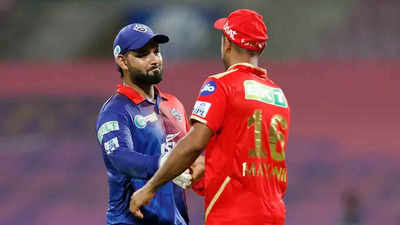

In [24]:
caption1 = soup.find('div', attrs={'class' : "_3p5Tz img_cptn"})
print(caption1.get_text())
image1 = Image.open(requests.get('https://static.toiimg.com/thumb/msid-91607745,imgsize-40114,width-400,resizemode-4/91607745.jpg', stream = True).raw)
image1

1/10In Pics, IPL 2022 Match 64: Marsh, Thakur help Delhi into top four


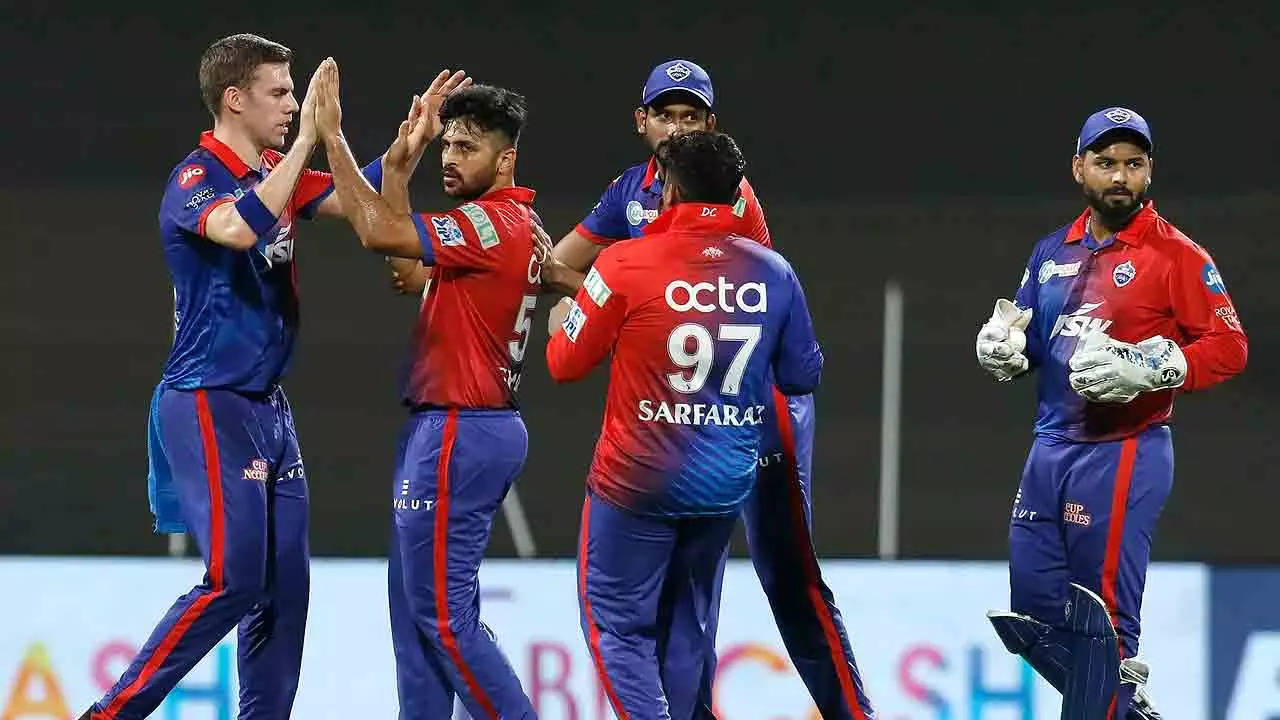

In [25]:
caption2 = soup.find('div', attrs={'class' : "_3pf9G"})
print(caption2.get_text())
image2 = Image.open(requests.get('https://static.toiimg.com/photo/91611793.cms', stream = True).raw)
image2

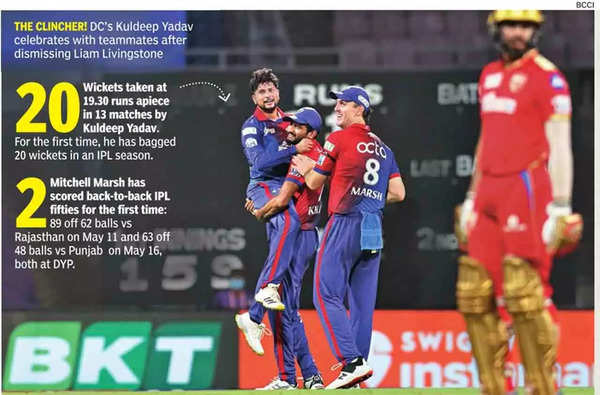

In [26]:
image3 = Image.open(requests.get('https://static.toiimg.com/thumb/imgsize-23456,msid-91607764,width-600,resizemode-4/91607764.jpg', stream = True).raw)
image3

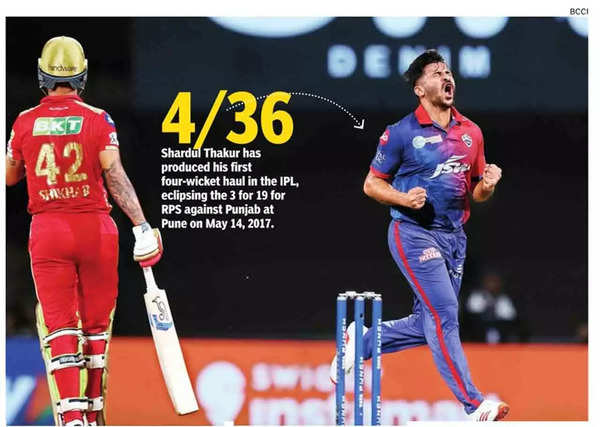

In [27]:
image4 = Image.open(requests.get('https://static.toiimg.com/thumb/imgsize-23456,msid-91607768,width-600,resizemode-4/91607768.jpg', stream=True).raw)
image4

## Sport News 2

In [32]:
url = 'https://timesofindia.indiatimes.com/sports/cricket/ipl/top-stories/ipl-2022-final-its-first-timers-vs-first-ever-champs-as-gujarat-titans-face-rajasthan-royals/articleshow/91863806.cms'

sports_html = requests.get(url).text

In [31]:
#sports_html.status_code

200

In [34]:
soup = BeautifulSoup(sports_html, 'lxml')
soup.prettify()

'<!DOCTYPE html>\n<html class="no-js" lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <meta content="ie=edge" http-equiv="x-ua-compatible"/>\n  <meta content="width=device-width, initial-scale=1, maximum-scale=1.0, user-scalable=no" name="viewport"/>\n  <title>\n   IPL 2022 Final: It\'s first-timers vs first-ever champs as Gujarat Titans face Rajasthan Royals | Cricket News - Times of India\n  </title>\n  <meta content="Cricket News: Fired by Jos Buttlerâ\x80\x99s marauding blade and inspired by Shane Warneâ\x80\x99s memories, Rajasthan Royals will hope to complete the last chapter in their fairyt" name="description"/>\n  <meta content="IPL, IPL 2022, Indian Premier League, IPL news, IPL Live Score,Sanju Samson,Rajasthan Royals,IPL 2022 Final,IPL 2022,Hardik Pandya,Gujarat Titans face Rajasthan Royals,Gujarat Titans,GT vs RR" name="keywords"/>\n  <link href="https://timesofindia.indiatimes.com/sports/cricket/ipl/top-stories/ipl-2022-final-its-first-timers-vs-first-ever-champs-as-guja

In [37]:
title = soup.find('title')
title.get_text()

"IPL 2022 Final: It's first-timers vs first-ever champs as Gujarat Titans face Rajasthan Royals | Cricket News - Times of India"

In [44]:
news = soup.find('div', attrs={'class' : '_3YYSt clearfix'})
news = news.get_text(strip = True)
news

'AHMEDABAD: Fired by Jos Buttlerâ\x80\x99s marauding blade and inspired by Shane Warneâ\x80\x99s memories,Rajasthan Royalswill hope to complete the last chapter in their fairytale season when they take onGujarat Titansin the IPL final here on Sunday. The Titans themselves are living a dream in their debut season.What will add to the electric atmosphere and act as the â\x80\x9812th manâ\x80\x99 forHardik Pandyaâ\x80\x99s Titans is the presence of almost one lakh cheering fans, who will watch their new IPL team playing for the first time.RR and GT will look to cap off what has been a simply magnificent season. Having lost to the Titans in Qualifier 1 at the Eden Gardens earlier this week,Sanju Samsonâ\x80\x99s Royals, relying heavily on Buttler, will be slight underdogs. However, they were the underdogs 14 years ago too, when Warne, who tragically passed away just a few weeks ago, led them to IPL glory in the inaugural edition.It wouldnâ\x80\x99t be a surprise if, for the last three days

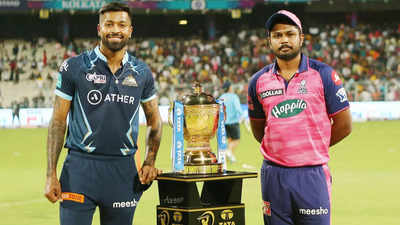

In [46]:
image21 = Image.open(requests.get('https://static.toiimg.com/thumb/msid-91864168,imgsize-106530,width-400,resizemode-4/91864168.jpg', stream = True).raw)
image21

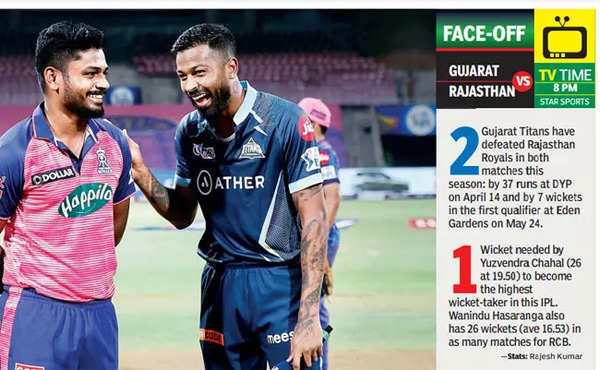

In [47]:
image22 = Image.open(requests.get('https://static.toiimg.com/thumb/imgsize-23456,msid-91864063,width-600,resizemode-4/91864063.jpg', stream = True).raw)
image22

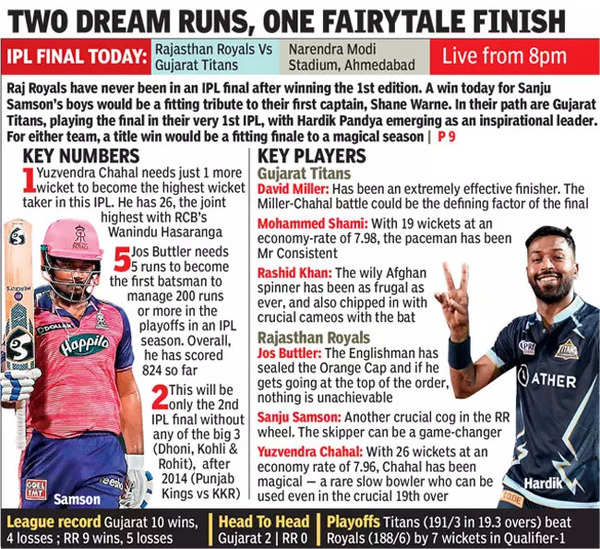

In [48]:
image23 = Image.open(requests.get('https://static.toiimg.com/thumb/imgsize-23456,msid-91864785,width-600,resizemode-4/91864785.jpg', stream = True).raw)
image23

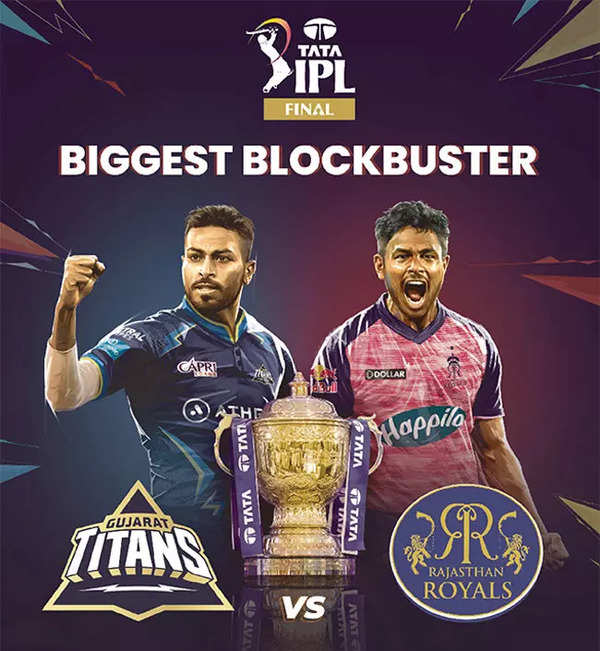

In [49]:
image24 = Image.open(requests.get('https://static.toiimg.com/thumb/imgsize-23456,msid-91864331,width-600,resizemode-4/91864331.jpg', stream = True).raw)
image24